In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque
from scipy import stats
import sys

In [10]:
rand_mu = 1
rand_sigma = 0.5
rand_std = np.sqrt(rand_sigma)
alpha = 11
_lambda = 13
B = 1000
N = 100000 + B

In [11]:
def f(x):
    return stats.gamma.pdf(x, alpha, scale=1/_lambda)

In [12]:
def q(x):
    return stats.norm.pdf(x, loc=rand_mu, scale=rand_std)

In [13]:
def r(theta, a):
    return (
        (q(theta) * f(a))
        / (q(a) * f(theta))
    )

In [14]:
def rand():
    return np.random.normal(rand_mu, rand_std)

In [16]:
data = deque([rand()])
accept_count = 1
for i in range(2, N):
    if not i % 1000: # 進捗用
        sys.stdout.write("%s / %s %s %%  \r" % (i, N, np.round(100 * (i / N), decimals=2)))
    a = rand()
    prev = data[len(data) - 1]
    if q(a) * f(prev) > q(prev) * f(a):
        if np.random.rand() < r(prev, a):
            data.append(a)
            accept_count = accept_count + 1
        else:
            data.append(prev)
    else:
        data.append(a)
        accept_count = accept_count + 1
print("\nacceptance ratio: %s " % str(accept_count / N))

100000 / 101000 99.01 %  
acceptance ratio: 0.4129108910891089 


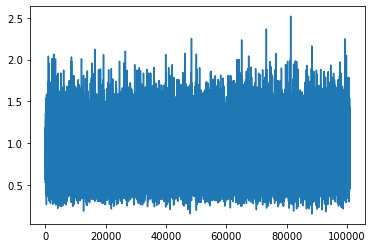

In [17]:
pd.Series(data).plot()

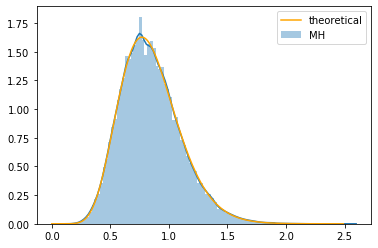

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.distplot(list(data)[B:],bins=100, label='MH', ax=ax)
arr = np.arange(0, 2.5, 0.01)
sns.lineplot(
    data=pd.DataFrame(
        data=f(arr),
        index=arr,
        columns=['theoretical']
    ),
    ax=ax,
    palette=['orange']
)